<a href="https://colab.research.google.com/github/calosos/Prototype_Day_Trading/blob/main/Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Instalación de paquetes

In [ ]:
!pip install fxcmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 949 kB/s 
     |████████████████████████████████| 52 kB 422 kB/s 
     |████████████████████████████████| 52 kB 348 kB/s 


In [ ]:
!pip install fxcmpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.4 MB/s 


In [ ]:
!pip install mplfinance --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2.Librerías

In [ ]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl,plt
import fxcmpy

In [ ]:
import mplfinance as mpf

In [ ]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [ ]:
from fxcmpy import  fxcmpy_candles_data_reader as cdr

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'
%matplotlib inline

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from scipy.stats import iqr, skew,kurtosis

#3.Conexión con el Broker

In [ ]:
TOKEN= 'd2d5eb519f51ce90b82aaf4e4974da3e689260f5'

In [ ]:
con = fxcmpy.fxcmpy(access_token='d2d5eb519f51ce90b82aaf4e4974da3e689260f5' )

|WARNING|2022-07-13 03:36:28,403|Default account set to 1551091, to change use set_default_account().


In [ ]:
#con = fxcmpy.fxcmpy(access_token='6823b7ece7256708d084371f0863f89ac092bb2f', server = 'demo' ) #Cuenta Demo
#con = fxcmpy.fxcmpy(access_token='6823b7ece7256708d084371f0863f89ac092bb2f', server = 'real' ) #Cuenta Real

Documentación API: 
1. https://fxcm.github.io/rest-api-docs/
2. https://github.com/fxcm/RestAPI/tree/master/fxcm-api-rest-python3-example




#4.Retrieving Data

##Trabajando con la API

In [ ]:
fxcmpy.__version__

'1.3.3'

In [ ]:
instruments  = con.get_instruments()

In [ ]:
print( instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'Bund', '5USNote', '10USNote', '2USNote', 'Bobl', 'Schatz', 'FED30D', 'EURIBOR3M', 'EURDLR3M', 'SONIA3M', 'IBHY', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'CryptoMajor', 'EOS/USD', 'XLM/USD', 'ADA/USD', 'DOGE/USD', 'DOT/USD', 'BTC/EUR', 'BTC/AUD', 'BTC/GBP', 'ETH/EU

##Recuperando Datos Historicos

Para realizar pruebas de los algoritmos

peridos: m1, m5, m15, m30,H1, H2, H4, H6, H8, D1, W1, M1

In [ ]:
candles = con.get_candles('EUR/USD', number=10000, period='H1')

In [ ]:
start =  dt.datetime(2021,1,1)
stop = dt.datetime(2022,1,1)
period ='D1'
candle_2 = con.get_candles('EUR/GBP', period=period, start= start, stop=stop)

In [ ]:
candles_3 = con.get_candles('EUR/USD', period='m1', number=250)

In [ ]:
candles.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-12-14 09:00:00,1.21432,1.21571,1.21597,1.21380,1.21443,1.21582,1.21609,1.21392,10796
2020-12-14 10:00:00,1.21571,1.21501,1.21592,1.21472,1.21582,1.21511,1.21604,1.21484,9812
2020-12-14 11:00:00,1.21501,1.21546,1.21600,1.21493,1.21511,1.21557,1.21612,1.21505,9902
2020-12-14 12:00:00,1.21546,1.21569,1.21702,1.21519,1.21557,1.21580,1.21714,1.21531,12011
2020-12-14 13:00:00,1.21569,1.21709,1.21762,1.21559,1.21580,1.21720,1.21774,1.21571,12262


In [ ]:
candles.shape

(10000, 9)

|ERROR|2022-07-13 04:12:43,012|Call of output raised an error:
|ERROR|2022-07-13 04:12:43,015|<class 'TypeError'>
|ERROR|2022-07-13 04:12:43,018|not all arguments converted during string formatting


In [ ]:
candles.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2020-12-14 09:00:00 to 2022-07-13 04:00:00
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bidopen   10000 non-null  float64
 1   bidclose  10000 non-null  float64
 2   bidhigh   10000 non-null  float64
 3   bidlow    10000 non-null  float64
 4   askopen   10000 non-null  float64
 5   askclose  10000 non-null  float64
 6   askhigh   10000 non-null  float64
 7   asklow    10000 non-null  float64
 8   tickqty   10000 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 781.2 KB


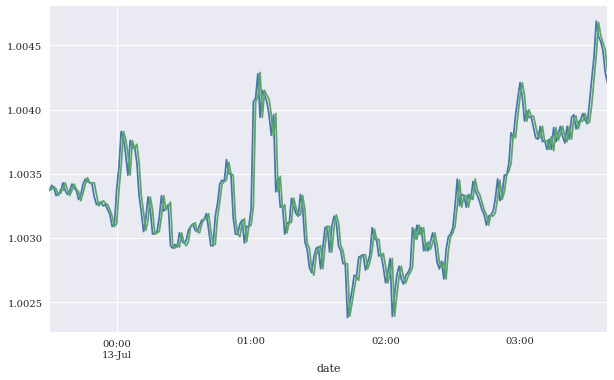

In [ ]:
candles_3['askclose'].plot(figsize=(10,6))
candles_3['askopen'].plot(figsize=(10,6))

##Recuperando datos en vivo




Funcion para la salida de datos

In [ ]:
def output(data, dataframe):
  print('%3d | %s | %s | %6.5f' 
        %(len(dataframe), data['Symbol'],
          pd.to_datetime(int(data['Updated']), unit ='ms'),
          data['Rates'][0],data['Rates'][1]))

Suscribir a los datos

In [ ]:
con.subscribe_market_data('EUR/USD',(output,))

Obtener el último precio

In [ ]:
con.get_last_price('EUR/USD')

Bid     1.00406
Ask     1.00419
High    1.00212
Low     1.00488
Name: 2022-07-13 03:42:02.995000, dtype: float64

Quitar la subscricion a los datos

In [ ]:
con.unsubscribe_market_data('EUR/USD')

Ver síbolos suscritos

In [ ]:
con.get_subscribed_symbols()

['EUR/USD']

#5.Colocar ordenes

Muestra  las pociciones abiertas para la cuenta conectasa

In [ ]:
con.get_open_positions().T

Abre  una posición  fe 100,000 el el EUR/USD 

In [ ]:
nueva_orden = con.create_market_buy_order('EUR/USD',10) #

Seleccionar lo siguientes elmenentos 

In [ ]:
sel=['tradeId', 'amountK', 'currency', 'grossPL', 'isBuy']

Usando la lista guarada en  la variable "sel" se muestran solo esa información de las posiciones abiertas

In [ ]:
con.get_open_positions()[sel]


Abre otra posición   de 50,000 en el EUR/GBP

In [ ]:
order= con.create_market_sell_order('EUR/GBP',10)

In [ ]:
con.get_open_positions()[sel]

La función  "create_market_buy_oreder()" abre o incrementa las posiciones. La función "create_market_sell_order()" permite el cierre de un posición  o reducirla.
Hay otoros métodos que permiten cerrar posiciones, como los siguientes:

In [ ]:
order = con.create_market_sell_order('EUR/USD',7) #7=70,000

In [ ]:
order = con.create_market_sell_order('EUR/GBP',7) #7=70,000

Cerrar posiciones por símbolo

In [ ]:
con.close_all_for_symbol('EUR/GBP')

Cerrar todas las posiciones abiertas


In [ ]:
con.close_all()

In [ ]:
con.get_open_positions()

#6.Información de la cuenta

Cuenta

In [ ]:
con.get_default_account()

1551091

In [ ]:
con.get_accounts().T

,0
t,6
ratePrecision,0
accountId,1551091
balance,20000
usdMr,0
mc,N
mcDate,
accountName,01551091
usdMr3,0
hedging,Y


#Aplicación Módulo 5

In [ ]:
candles.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-12-14 09:00:00,1.21432,1.21571,1.21597,1.21380,1.21443,1.21582,1.21609,1.21392,10796
2020-12-14 10:00:00,1.21571,1.21501,1.21592,1.21472,1.21582,1.21511,1.21604,1.21484,9812
2020-12-14 11:00:00,1.21501,1.21546,1.21600,1.21493,1.21511,1.21557,1.21612,1.21505,9902
2020-12-14 12:00:00,1.21546,1.21569,1.21702,1.21519,1.21557,1.21580,1.21714,1.21531,12011
2020-12-14 13:00:00,1.21569,1.21709,1.21762,1.21559,1.21580,1.21720,1.21774,1.21571,12262


In [ ]:
candles_bid = candles[candles.columns[:4]] 
candles_bid=candles_bid.rename(columns={"bidopen": "Open", "bidclose": "Close",'bidhigh':'High','bidlow':'Low'})
candles_bid.tail()


,Open,Close,High,Low
date,,,,
2022-07-13 00:00:00,1.00294,1.00298,1.00390,1.00264
2022-07-13 01:00:00,1.00298,1.00264,1.00447,1.00221
2022-07-13 02:00:00,1.00265,1.00396,1.00409,1.00222
2022-07-13 03:00:00,1.00396,1.00359,1.00465,1.00337
2022-07-13 04:00:00,1.00361,1.00336,1.00376,1.00324


In [ ]:
candles_ask = candles[candles.columns[4:8]] 
candles_ask=candles_ask.rename(columns={"askopen": "Open", "askclose": "Close",'askhigh':'High','asklow':'Low'})
candles_ask.head()

Exception in thread Thread-21310:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

,Open,Close,High,Low
date,,,,
2020-12-14 09:00:00,1.21443,1.21582,1.21609,1.21392
2020-12-14 10:00:00,1.21582,1.21511,1.21604,1.21484
2020-12-14 11:00:00,1.21511,1.21557,1.21612,1.21505
2020-12-14 12:00:00,1.21557,1.21580,1.21714,1.21531
2020-12-14 13:00:00,1.21580,1.21720,1.21774,1.21571


In [ ]:
instrument= 'EUR/USD'

Exception in thread Thread-19134:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

<Mpf_Figure size 2000x1400 with 0 Axes>

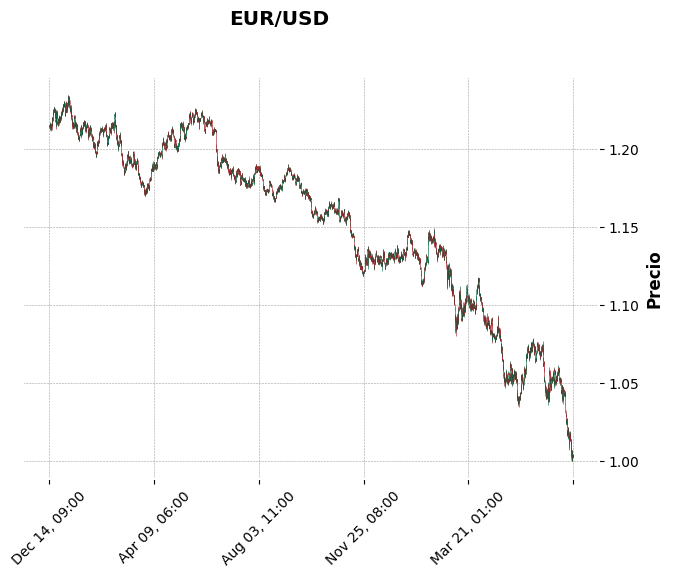

In [ ]:
mpf.figure(figsize=(20, 14))
mpf.plot(candles_bid, type='candle', style='charles', title= instrument, ylabel= 'Precio', figscale=1);

In [ ]:
candles_bid['Mid']=candles_bid[['Open','Close']].mean(axis=1)
candles_bid.head(3)

,Open,Close,High,Low,Mid
date,,,,,
2020-12-14 09:00:00,1.21432,1.21571,1.21597,1.21380,1.215015
2020-12-14 10:00:00,1.21571,1.21501,1.21592,1.21472,1.215360
2020-12-14 11:00:00,1.21501,1.21546,1.21600,1.21493,1.215235


In [ ]:
pruebe =pd.DataFrame(candles_bid['Mid'].value_counts())
pruebe[pruebe['Mid']   == np.nan]

,Mid


In [ ]:
data = pd.DataFrame(candles_bid['Mid'])
data

,Mid
date,
2020-12-14 09:00:00,1.215015
2020-12-14 10:00:00,1.215360
2020-12-14 11:00:00,1.215235
2020-12-14 12:00:00,1.215575
2020-12-14 13:00:00,1.216390
...,...
2022-07-13 00:00:00,1.002960
2022-07-13 01:00:00,1.002810
2022-07-13 02:00:00,1.003305


In [ ]:
data.rename(columns={'Mid': 'price'}, inplace=True)

In [ ]:
data_2 = pd.DataFrame(candles_bid['Mid'])
data_2.rename(columns={'Mid': 'price'}, inplace=True)

In [ ]:
data_3 = pd.DataFrame(candles_bid['Mid'])
data_3.rename(columns={'Mid': 'price'}, inplace=True)

In [ ]:
data_4 = pd.DataFrame(candles_bid['Mid'])
data_4.rename(columns={'Mid': 'price'}, inplace=True)

In [ ]:
data

,price
date,
2020-12-14 09:00:00,1.215015
2020-12-14 10:00:00,1.215360
2020-12-14 11:00:00,1.215235
2020-12-14 12:00:00,1.215575
2020-12-14 13:00:00,1.216390
...,...
2022-07-13 00:00:00,1.002960
2022-07-13 01:00:00,1.002810
2022-07-13 02:00:00,1.003305


In [ ]:
lags = 5

#Regresión Lineal Usando NUmpy

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag) # <1>
    cols.append(col)
data.dropna(inplace=True)

In [ ]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']

In [ ]:
reg = np.linalg.lstsq(data[cols], data['price'],
                      rcond=None)[0]

In [ ]:
reg

array([ 1.70237658, -1.18635909,  0.75997204, -0.40796708,  0.131966  ])

In [ ]:
data['prediction'] = np.dot(data[cols], reg)

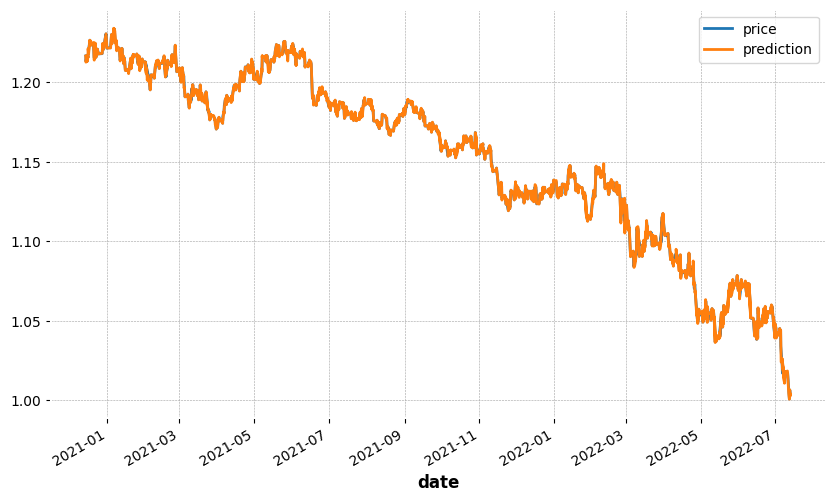

In [ ]:
data[['price', 'prediction']].plot(figsize=(10, 6));

In [ ]:
data

Exception in thread Thread-33832:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction
date,,,,,,,
2020-12-14 14:00:00,1.216720,1.216390,1.215575,1.215235,1.215360,1.215015,1.216704
2020-12-14 15:00:00,1.214390,1.216720,1.216390,1.215575,1.215235,1.215360,1.216654
2020-12-14 16:00:00,1.213415,1.214390,1.216720,1.216390,1.215575,1.215235,1.212760
2020-12-14 17:00:00,1.215045,1.213415,1.214390,1.216720,1.216390,1.215575,1.213827
2020-12-14 18:00:00,1.215345,1.215045,1.213415,1.214390,1.216720,1.216390,1.215961
...,...,...,...,...,...,...,...
2022-07-13 00:00:00,1.002960,1.003010,1.003250,1.003375,1.003265,1.003790,1.002990
2022-07-13 01:00:00,1.002810,1.002960,1.003010,1.003250,1.003375,1.003265,1.002980
2022-07-13 02:00:00,1.003305,1.002810,1.002960,1.003010,1.003250,1.003375,1.002668


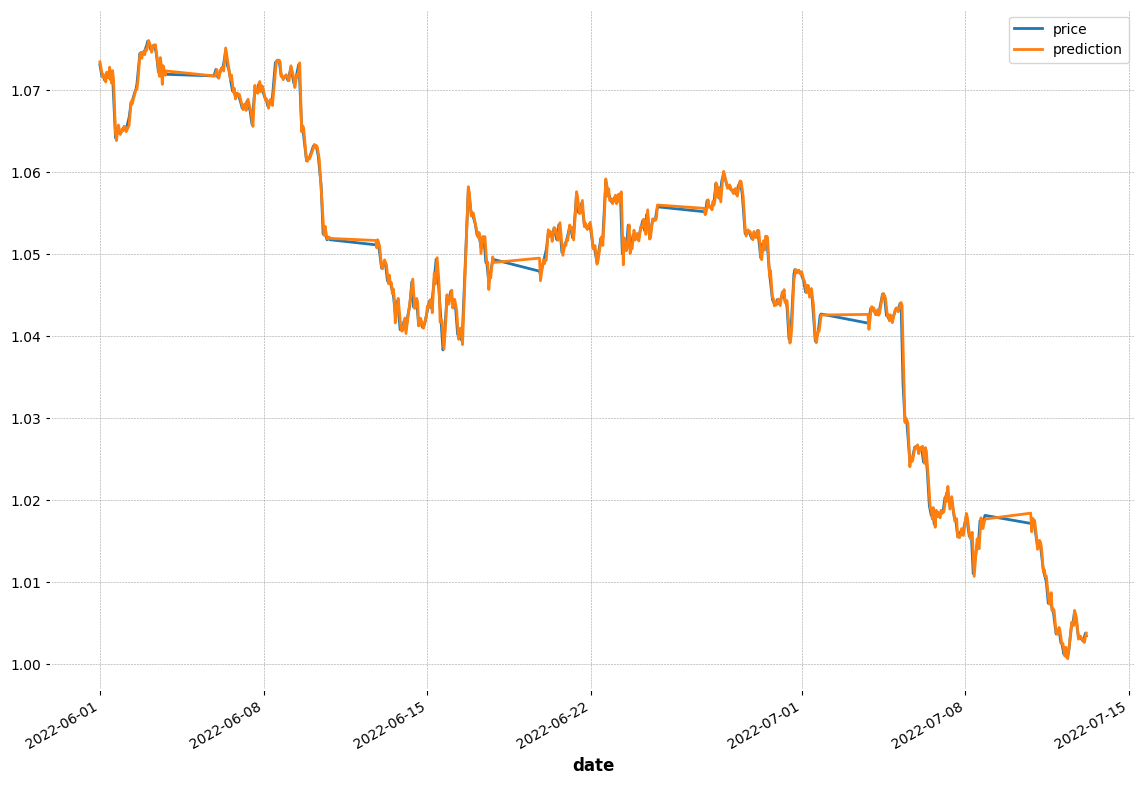

|ERROR|2022-07-13 04:45:54,543|Call of output raised an error:
|ERROR|2022-07-13 04:45:54,545|<class 'TypeError'>
|ERROR|2022-07-13 04:45:54,555|not all arguments converted during string formatting
Exception in thread Thread-34926:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
data[['price', 'prediction']].loc['2022-06-1':].plot(
            figsize=(14, 10));

In [ ]:
data['return'] = np.log(data['price'] /
                         data['price'].shift(1))

In [ ]:
data.dropna(inplace=True)

Exception in thread Thread-35502:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag) # <3>
    cols.append(col)
data.dropna(inplace=True)

In [ ]:
reg = np.linalg.lstsq(data[cols], data['return'],
                      rcond=None)[0]

In [ ]:
reg

array([ 1.70237658, -1.18635909,  0.75997204, -0.40796708,  0.131966  ])

In [ ]:
data['prediction'] = np.dot(data[cols], reg)

Retorno Esérado

In [ ]:
data

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
date,,,,,,,,
2020-12-14 20:00:00,1.214650,-0.000440,0.000247,0.001342,-0.000803,-0.001917,0.000052,-0.000132
2020-12-14 21:00:00,1.214465,-0.000132,-0.000440,0.000247,0.001342,-0.000803,-0.000168,-0.000152
2020-12-14 22:00:00,1.214325,-0.000152,-0.000132,-0.000440,0.000247,0.001342,-0.000361,-0.000115
2020-12-14 23:00:00,1.214595,-0.000115,-0.000152,-0.000132,-0.000440,0.000247,0.000097,0.000222
2020-12-15 00:00:00,1.215230,0.000222,-0.000115,-0.000152,-0.000132,-0.000440,0.000395,0.000523
...,...,...,...,...,...,...,...,...
2022-07-13 00:00:00,1.002960,-0.000239,-0.000125,0.000110,-0.000523,-0.001299,-0.000134,-0.000050
2022-07-13 01:00:00,1.002810,-0.000050,-0.000239,-0.000125,0.000110,-0.000523,-0.000009,-0.000150
2022-07-13 02:00:00,1.003305,-0.000150,-0.000050,-0.000239,-0.000125,0.000110,-0.000312,0.000493


In [ ]:
hits = np.sign(data['return'] *
               data['prediction']).value_counts()

In [ ]:
hits

 1.0    7019
-1.0    2925
 0.0      45
dtype: int64

|ERROR|2022-07-13 04:50:59,831|Call of output raised an error:
|ERROR|2022-07-13 04:50:59,835|<class 'TypeError'>
|ERROR|2022-07-13 04:50:59,839|not all arguments converted during string formatting


EValuacion de la regresión, tomnado en cuenta los aciertos

In [ ]:
hits.values[0] / sum(hits)

0.7026729402342576

In [ ]:
data['strategy'] = data['prediction'] * data['return']

In [ ]:
data[['return', 'strategy']].sum().apply(np.exp)

Exception in thread Thread-45472:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

return      0.826043
strategy    1.003281
dtype: float64

In [ ]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return,strategy
date,,,,,,,,,
2020-12-14 20:00:00,1.214650,-0.000440,0.000247,0.001342,-0.000803,-0.001917,0.000052,-0.000132,-6.912485e-09
2020-12-14 21:00:00,1.214465,-0.000132,-0.000440,0.000247,0.001342,-0.000803,-0.000168,-0.000152,2.557646e-08
2020-12-14 22:00:00,1.214325,-0.000152,-0.000132,-0.000440,0.000247,0.001342,-0.000361,-0.000115,4.164289e-08
2020-12-14 23:00:00,1.214595,-0.000115,-0.000152,-0.000132,-0.000440,0.000247,0.000097,0.000222,2.146620e-08
2020-12-15 00:00:00,1.215230,0.000222,-0.000115,-0.000152,-0.000132,-0.000440,0.000395,0.000523,2.065154e-07


In [ ]:
data['strategy'] = data['prediction'] * data['return']
data[['return', 'strategy']].sum().apply(np.exp)

return      0.826043
strategy    1.003281
dtype: float64

#regresión logistiza con sckitlearn[texto del vínculo](https://)

In [ ]:
from sklearn import linear_model

|ERROR|2022-07-13 05:12:09,118|Call of output raised an error:
|ERROR|2022-07-13 05:12:09,120|<class 'TypeError'>
|ERROR|2022-07-13 05:12:09,125|not all arguments converted during string formatting
Exception in thread Thread-48824:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
lm = linear_model.LinearRegression()

In [ ]:
data_2.head()

,price
date,
2020-12-14 09:00:00,1.215015
2020-12-14 10:00:00,1.215360
2020-12-14 11:00:00,1.215235
2020-12-14 12:00:00,1.215575
2020-12-14 13:00:00,1.216390


In [ ]:
data_2['return'] = np.log(data_2['price'] / data_2['price'].shift(1))

Exception in thread Thread-52438:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
data_2

,price,return
date,,
2020-12-14 10:00:00,1.215360,0.000284
2020-12-14 11:00:00,1.215235,-0.000103
2020-12-14 12:00:00,1.215575,0.000280
2020-12-14 13:00:00,1.216390,0.000670
2020-12-14 14:00:00,1.216720,0.000271
...,...,...
2022-07-13 00:00:00,1.002960,-0.000050
2022-07-13 01:00:00,1.002810,-0.000150
2022-07-13 02:00:00,1.003305,0.000493


In [ ]:
data_2.dropna(inplace=True)

In [ ]:
lags = 3

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data_2[col] = data_2['return'].shift(lag)
    cols.append(col)

In [ ]:

data_2.dropna(inplace=True)

In [ ]:

from sklearn.metrics import accuracy_score

In [ ]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                     multi_class='auto',
                                     max_iter=1000)

In [ ]:
lm.fit(data_2[cols], np.sign(data_2['return']))

|ERROR|2022-07-13 05:23:40,449|Call of output raised an error:
|ERROR|2022-07-13 05:23:40,459|<class 'TypeError'>
|ERROR|2022-07-13 05:23:40,463|not all arguments converted during string formatting
Exception in thread Thread-55419:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

LogisticRegression(C=10000000.0, max_iter=1000)

In [ ]:
data_2['prediction'] = lm.predict(data_2[cols])

In [ ]:

data_2['prediction'].value_counts()

-1.0    5120
 1.0    4876
Name: prediction, dtype: int64

#Evaluaciónde la regresión linel

In [ ]:
hits = np.sign(data_2['return'].iloc[lags:] *
               data_2['prediction'].iloc[lags:]
              ).value_counts()
              
hits

 1.0    6948
-1.0    3000
 0.0      45
dtype: int64

In [ ]:

accuracy_score(data_2['prediction'],
               np.sign(data_2['return']))

0.6953781512605042

In [ ]:
data_2['strategy'] = data_2['prediction'] * data_2['return']

In [ ]:
data_2[['return', 'strategy']].sum().apply(np.exp)

Exception in thread Thread-57602:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

return       0.825523
strategy    11.412552
dtype: float64

In [ ]:
data_2

,price,return,lag_1,lag_2,lag_3,prediction,strategy
date,,,,,,,
2020-12-14 13:00:00,1.216390,0.000670,0.000280,-0.000103,0.000284,1.0,0.000670
2020-12-14 14:00:00,1.216720,0.000271,0.000670,0.000280,-0.000103,1.0,0.000271
2020-12-14 15:00:00,1.214390,-0.001917,0.000271,0.000670,0.000280,-1.0,0.001917
2020-12-14 16:00:00,1.213415,-0.000803,-0.001917,0.000271,0.000670,-1.0,0.000803
2020-12-14 17:00:00,1.215045,0.001342,-0.000803,-0.001917,0.000271,1.0,0.001342
...,...,...,...,...,...,...,...
2022-07-13 00:00:00,1.002960,-0.000050,-0.000239,-0.000125,0.000110,-1.0,0.000050
2022-07-13 01:00:00,1.002810,-0.000150,-0.000050,-0.000239,-0.000125,1.0,-0.000150
2022-07-13 02:00:00,1.003305,0.000493,-0.000150,-0.000050,-0.000239,-1.0,-0.000493


|ERROR|2022-07-13 05:29:43,471|Call of output raised an error:
|ERROR|2022-07-13 05:29:43,480|<class 'TypeError'>
|ERROR|2022-07-13 05:29:43,495|not all arguments converted during string formatting
Exception in thread Thread-58724:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

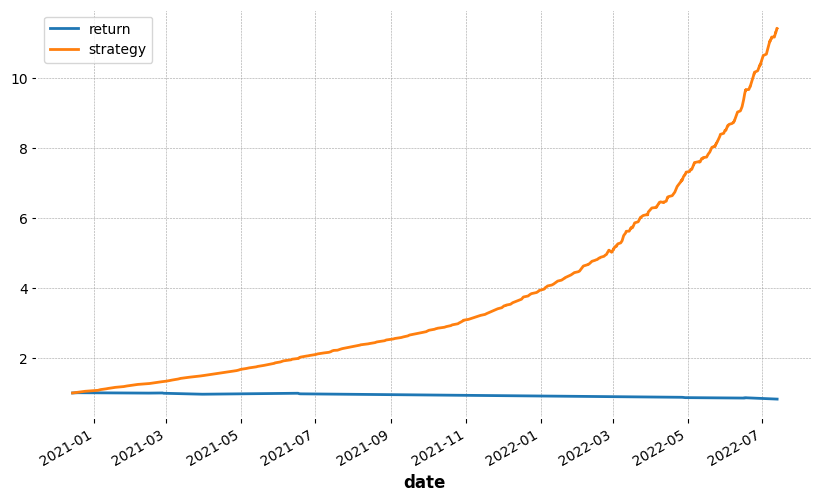

|ERROR|2022-07-13 05:29:44,110|Call of output raised an error:
|ERROR|2022-07-13 05:29:44,121|<class 'TypeError'>
|ERROR|2022-07-13 05:29:44,130|not all arguments converted during string formatting
Exception in thread Thread-58729:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
data_2[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));

#Intento 2

In [ ]:
data_3

,price,return
date,,
2020-12-14 11:00:00,1.215235,-0.000103
2020-12-14 12:00:00,1.215575,0.000280
2020-12-14 13:00:00,1.216390,0.000670
2020-12-14 14:00:00,1.216720,0.000271
2020-12-14 15:00:00,1.214390,-0.001917
...,...,...
2022-07-13 00:00:00,1.002960,-0.000050
2022-07-13 01:00:00,1.002810,-0.000150
2022-07-13 02:00:00,1.003305,0.000493


In [ ]:

data_3['return'] = np.log(data_3['price'] / data_3['price'].shift(1))

In [ ]:
data_3.dropna(inplace=True)

In [ ]:

lags = 5

In [ ]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data_3[col] = data_3['price'].shift(lag)
    cols.append(col)
data_3.dropna(inplace=True)

In [ ]:
lm.fit(data_3[cols], np.sign(data_3['return']))

|ERROR|2022-07-13 05:43:17,750|Call of output raised an error:
|ERROR|2022-07-13 05:43:17,754|<class 'TypeError'>
|ERROR|2022-07-13 05:43:17,758|not all arguments converted during string formatting
Exception in thread Thread-67764:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

LogisticRegression(C=10000000.0, max_iter=1000)

In [ ]:
data_3['prediction'] = lm.predict(data_3[cols])

In [ ]:
data_3['prediction'].value_counts()

-1.0    5123
 1.0    4870
Name: prediction, dtype: int64

#Evaluación del modelo

In [ ]:
hits = np.sign(data_3['return'].iloc[lags:] *
               data_3['prediction'].iloc[lags:]
              ).value_counts()
hits

 1.0    6988
-1.0    2955
 0.0      45
dtype: int64

In [ ]:
accuracy_score(data['prediction'],
               np.sign(data['return']))

0.6996696366002603

In [ ]:
data_3['strategy'] = data_3['prediction'] * data_3['return']

data_3[['return', 'strategy']].sum().apply(np.exp)

return       0.826328
strategy    11.839196
dtype: float64

Exception in thread Thread-69216:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

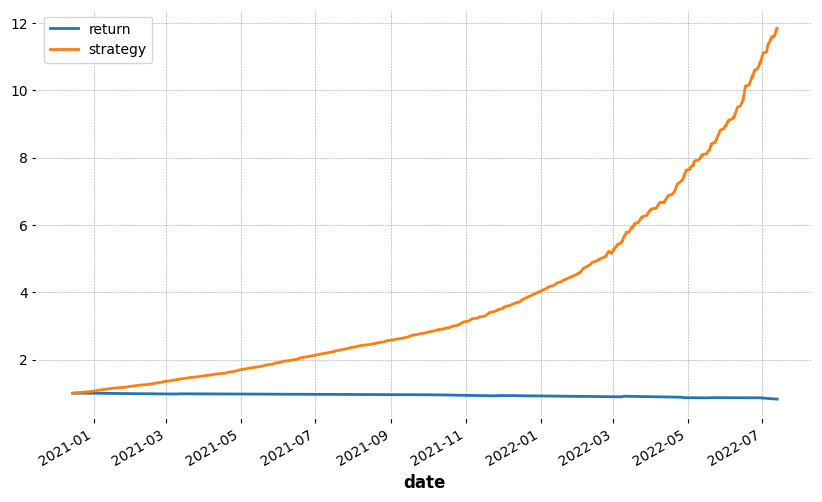

In [ ]:
data_3[['return', 'strategy']].cumsum().apply(np.exp).plot(
                                        figsize=(10, 6));

#DeepLearning

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [ ]:
data_4.head()

,price
date,
2020-12-14 09:00:00,1.215015
2020-12-14 10:00:00,1.215360
2020-12-14 11:00:00,1.215235
2020-12-14 12:00:00,1.215575
2020-12-14 13:00:00,1.216390


In [ ]:
data_4['return'] = np.log(data_4['price'] /
                         data_4['price'].shift(1)) 
data_4['direction'] = np.where(data_4['return'] > 0, 1, 0)
lags = 5
cols = []
for lag in range(1, lags + 1): 
    col = f'lag_{lag}'
    data_4[col] = data_4['return'].shift(lag) 
    cols.append(col)
data_4.dropna(inplace=True) 

In [ ]:
data_4.round(4).tail()

Exception in thread Thread-75441:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

,price,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
date,,,,,,,,
2022-07-13 00:00:00,1.0030,-0.0000,0,-0.0002,-0.0001,0.0001,-0.0005,-0.0013
2022-07-13 01:00:00,1.0028,-0.0001,0,-0.0000,-0.0002,-0.0001,0.0001,-0.0005
2022-07-13 02:00:00,1.0033,0.0005,1,-0.0001,-0.0000,-0.0002,-0.0001,0.0001
2022-07-13 03:00:00,1.0038,0.0005,1,0.0005,-0.0001,-0.0000,-0.0002,-0.0001
2022-07-13 04:00:00,1.0035,-0.0003,0,0.0005,0.0005,-0.0001,-0.0000,-0.0002


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam

Exception in thread Thread-76415:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
optimizer = Adam(learning_rate=0.0001)

In [ ]:
import random

Exception in thread Thread-77039:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
        input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cutoff = '2021-01-31'
training_data = data_4[data_4.index < cutoff].copy()
mu, std = training_data.mean(), training_data.std()
training_data_ = (training_data - mu) / std
test_data = data_4[data_4.index >= cutoff].copy()
test_data_ = (test_data - mu) / std

In [ ]:
%%time
model.fit(training_data[cols],
          training_data['direction'],
          epochs=50, verbose=False,
          validation_split=0.2, shuffle=False)

|ERROR|2022-07-13 05:58:47,417|Call of output raised an error:
|ERROR|2022-07-13 05:58:47,428|<class 'TypeError'>
|ERROR|2022-07-13 05:58:47,430|not all arguments converted during string formatting
Exception in thread Thread-77892:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

CPU times: user 4.18 s, sys: 252 ms, total: 4.43 s
Wall time: 5.04 s


|ERROR|2022-07-13 05:58:50,413|Call of output raised an error:
|ERROR|2022-07-13 05:58:50,414|<class 'TypeError'>


In [ ]:
res = pd.DataFrame(model.history.history)

|ERROR|2022-07-13 05:59:21,399|Call of output raised an error:
|ERROR|2022-07-13 05:59:21,413|<class 'TypeError'>
|ERROR|2022-07-13 05:59:21,415|not all arguments converted during string formatting
Exception in thread Thread-78217:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

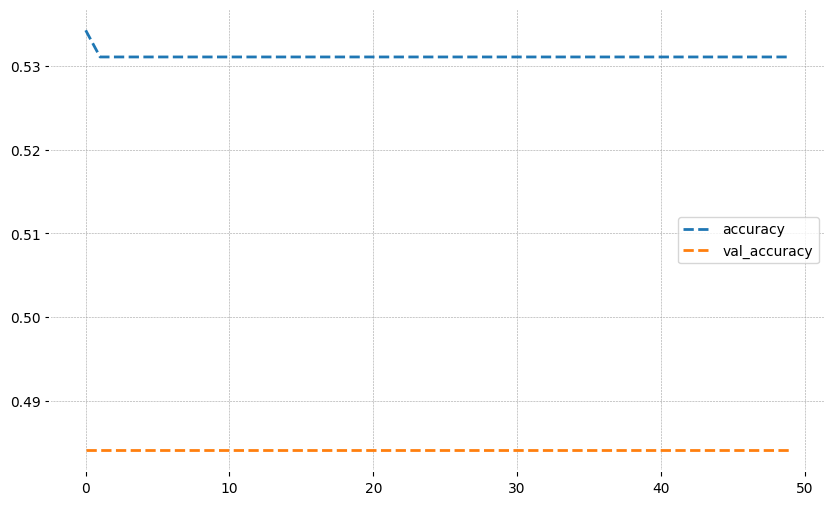

In [ ]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--');

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

25/25 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6071


[0.6650437116622925, 0.6071428656578064]

In [ ]:
pred = model.predict(training_data_[cols])
pred[:30].flatten()

array([0.5006312 , 0.02281803, 0.22907779, 0.6093037 , 0.45006758,
       0.08267185, 0.26505277, 0.39374596, 0.5041505 , 0.4879707 ,
       0.5665432 , 0.5444267 , 0.3719022 , 0.2770111 , 0.31511045,
       0.51744324, 0.49576604, 0.19704759, 0.3488763 , 0.5832412 ,
       0.6113852 , 0.2912939 , 0.05438462, 0.25159603, 0.57551867,
       0.57371855, 0.35475117, 0.28030413, 0.2724657 , 0.38885248],
      dtype=float32)

In [ ]:
training_data['prediction'] = np.where(pred > 0, 1, -1)
training_data['strategy'] = (training_data['prediction'] *
                            training_data['return'])
training_data[['return', 'strategy']].sum().apply(np.exp)

return      0.997201
strategy    0.997201
dtype: float64

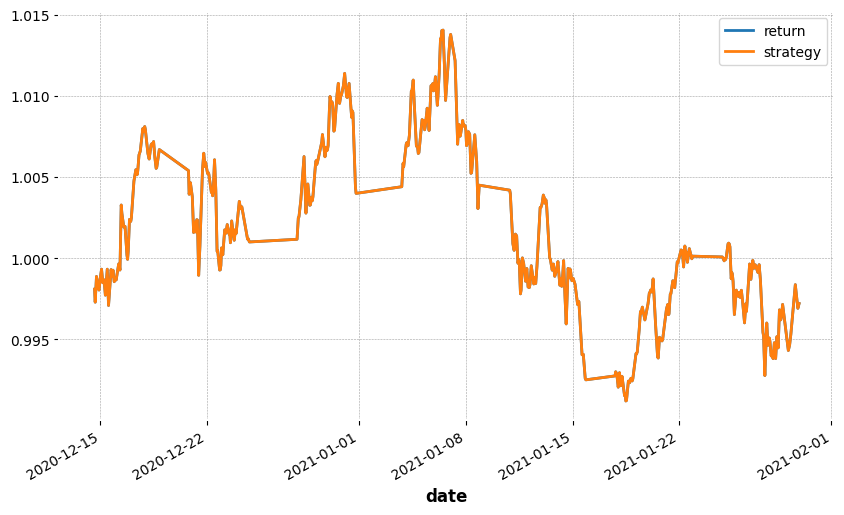

|ERROR|2022-07-13 06:01:37,205|Call of output raised an error:
|ERROR|2022-07-13 06:01:37,216|<class 'TypeError'>
|ERROR|2022-07-13 06:01:37,224|not all arguments converted during string formatting
Exception in thread Thread-79946:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

Exception in thread Thread-80486:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

254/288 [=========================>....] - ETA: 0s - loss: 0.6609 - accuracy: 0.6248

|ERROR|2022-07-13 06:02:18,604|Call of output raised an error:
|ERROR|2022-07-13 06:02:18,609|<class 'TypeError'>
|ERROR|2022-07-13 06:02:18,614|not all arguments converted during string formatting


288/288 [==============================] - 1s 3ms/step - loss: 0.6646 - accuracy: 0.6239


Exception in thread Thread-80497:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

[0.6646386384963989, 0.6238870620727539]

In [ ]:
pred = model.predict(test_data_[cols])

|ERROR|2022-07-13 06:02:40,545|Call of output raised an error:
|ERROR|2022-07-13 06:02:40,552|<class 'TypeError'>
|ERROR|2022-07-13 06:02:40,564|not all arguments converted during string formatting
Exception in thread Thread-80773:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
test_data['prediction'] = np.where(pred > 0, 1, -1)
test_data['prediction'].value_counts()

Exception in thread Thread-80991:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

1    9210
Name: prediction, dtype: int64

In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

return      0.827061
strategy    0.827061
dtype: float64

|ERROR|2022-07-13 06:03:48,392|Call of output raised an error:
|ERROR|2022-07-13 06:03:48,396|<class 'TypeError'>
|ERROR|2022-07-13 06:03:48,404|not all arguments converted during string formatting
Exception in thread Thread-81595:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

|ERROR|2022-07-13 06:04:01,576|Call of output raised an error:
|ERROR|2022-07-13 06:04:01,585|<class 'TypeError'>
|ERROR|2022-07-13 06:04:01,587|not all arguments converted during string formatting
Exception in thread Thread-81779:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

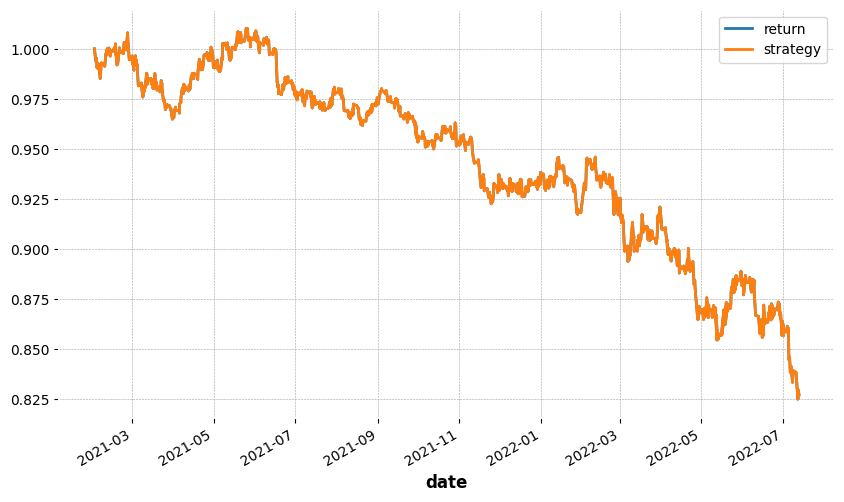

|ERROR|2022-07-13 06:04:02,352|Call of output raised an error:
|ERROR|2022-07-13 06:04:02,383|<class 'TypeError'>
|ERROR|2022-07-13 06:04:02,385|not all arguments converted during string formatting
Exception in thread Thread-81790:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

Con más Variables

In [ ]:
data_4['momentum'] = data_4['return'].rolling(5).mean().shift(1)
data_4['volatility'] = data_4['return'].rolling(20).std().shift(1)
data_4['distance'] = (data_4['price'] - data_4['price'].rolling(50).mean()).shift(1)
data_4.dropna(inplace=True)
cols.extend(['momentum', 'volatility', 'distance'])
print(data.round(4).tail())

                      price   lag_1   lag_2   lag_3   lag_4   lag_5  \
date                                                                  
2022-07-13 00:00:00  1.0030  1.0030  1.0032  1.0034  1.0033  1.0038   
2022-07-13 01:00:00  1.0028  1.0030  1.0030  1.0032  1.0034  1.0033   
2022-07-13 02:00:00  1.0033  1.0028  1.0030  1.0030  1.0032  1.0034   
2022-07-13 03:00:00  1.0038  1.0033  1.0028  1.0030  1.0030  1.0032   
2022-07-13 04:00:00  1.0035  1.0038  1.0033  1.0028  1.0030  1.0030   

                     prediction  return  strategy  
date                                               
2022-07-13 00:00:00        -1.0 -0.0000       0.0  
2022-07-13 01:00:00         1.0 -0.0001       0.0  
2022-07-13 02:00:00        -1.0  0.0005      -0.0  
2022-07-13 03:00:00         1.0  0.0005       0.0  
2022-07-13 04:00:00         1.0 -0.0003      -0.0  


In [ ]:
training_data = data_4[data_4.index < cutoff].copy()

|ERROR|2022-07-13 06:07:54,157|Call of output raised an error:
|ERROR|2022-07-13 06:07:54,167|<class 'TypeError'>
|ERROR|2022-07-13 06:07:54,175|not all arguments converted during string formatting


In [ ]:
mu, std = training_data.mean(), training_data.std()

In [ ]:
training_data_ = (training_data - mu) / std

In [ ]:

test_data = data_4[data_4.index >= cutoff].copy() 

In [ ]:
test_data_ = (test_data - mu) / std

In [ ]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
                input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

Exception in thread Thread-85266:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
%%time 
model.fit(training_data_[cols], training_data['direction'],
          verbose=False, epochs=25)

|ERROR|2022-07-13 06:08:59,462|Call of output raised an error:
|ERROR|2022-07-13 06:08:59,479|<class 'TypeError'>
|ERROR|2022-07-13 06:08:59,488|not all arguments converted during string formatting
Exception in thread Thread-85408:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

CPU times: user 2.33 s, sys: 102 ms, total: 2.43 s
Wall time: 2.5 s


Exception in thread Thread-85432:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

In [ ]:
model.evaluate(training_data_[cols], training_data['direction'])

|ERROR|2022-07-13 06:09:13,548|Call of output raised an error:
|ERROR|2022-07-13 06:09:13,551|<class 'TypeError'>
|ERROR|2022-07-13 06:09:13,558|not all arguments converted during string formatting
Exception in thread Thread-85562:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

23/23 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7084


[0.5885025858879089, 0.7084468603134155]

In [ ]:
pred = model.predict(training_data_[cols])
training_data['prediction'] = np.where(pred > 0, 1, -1)
training_data['strategy'] = training_data['prediction'] * \
                            training_data['return']
training_data[['return', 'strategy']].sum().apply(np.exp)

return      0.996117
strategy    0.996117
dtype: float64

|ERROR|2022-07-13 06:09:52,829|Call of output raised an error:
|ERROR|2022-07-13 06:09:52,848|<class 'TypeError'>
|ERROR|2022-07-13 06:09:52,850|not all arguments converted during string formatting
Exception in thread Thread-86007:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

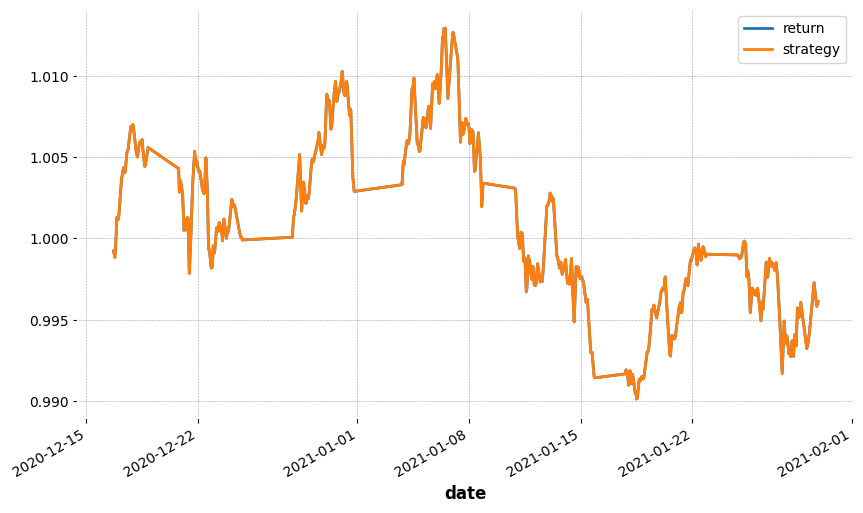

In [ ]:
training_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));

In [ ]:
model.evaluate(test_data_[cols], test_data['direction'])

288/288 [==============================] - 1s 2ms/step - loss: 0.6204 - accuracy: 0.6564


|ERROR|2022-07-13 06:10:11,076|Call of output raised an error:
|ERROR|2022-07-13 06:10:11,079|<class 'TypeError'>
|ERROR|2022-07-13 06:10:11,090|not all arguments converted during string formatting
Exception in thread Thread-86223:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

[0.6203742027282715, 0.6563518047332764]

|ERROR|2022-07-13 06:10:11,123|not all arguments converted during string formatting
|ERROR|2022-07-13 06:10:11,129|Call of output raised an error:
Exception in thread Thread-86235:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.pric

In [ ]:
pred = model.predict(test_data_[cols])
test_data['prediction'] = np.where(pred > 0, 1, -1)
test_data['prediction'].value_counts()

|ERROR|2022-07-13 06:10:30,607|Call of output raised an error:
|ERROR|2022-07-13 06:10:30,615|<class 'TypeError'>
|ERROR|2022-07-13 06:10:30,619|not all arguments converted during string formatting
Exception in thread Thread-86482:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

1    9210
Name: prediction, dtype: int64

|ERROR|2022-07-13 06:10:31,246|Call of output raised an error:


In [ ]:
test_data['strategy'] = (test_data['prediction'] *
                        test_data['return'])

In [ ]:
test_data[['return', 'strategy']].sum().apply(np.exp)

Exception in thread Thread-86717:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "<ipython-input-30-1a8c43fa5701>", line 5, in output
    data['Rates'][0],data['Rates'][1]))
TypeError: not all arguments conver

return      0.827061
strategy    0.827061
dtype: float64

|ERROR|2022-07-13 06:11:00,025|Call of output raised an error:
|ERROR|2022-07-13 06:11:00,031|<class 'TypeError'>
|ERROR|2022-07-13 06:11:00,039|not all arguments converted during string formatting
Exception in thread Thread-86815:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "/usr/local/lib/python3.7/dist-packages/socketio/client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "/usr/local/lib/python3.7/dist-packages/fxcmpy/fxcmpy.py", line 2575, in __on

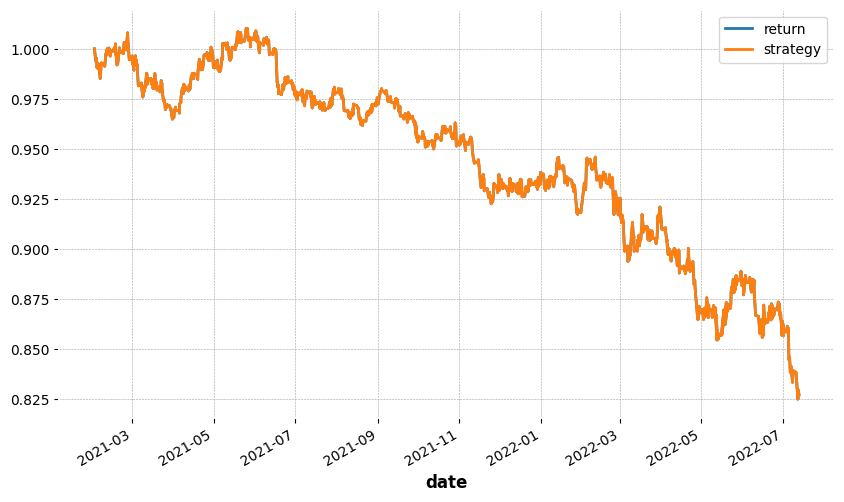

In [ ]:
test_data[['return', 'strategy']].cumsum(
                ).apply(np.exp).plot(figsize=(10, 6));